In [63]:
import pandas as pd
from datetime import datetime, timedelta
from os import path
import glob
import matplotlib.pyplot as plt
import numpy as np

In [111]:
date = datetime.today() - timedelta(days = 1)
min_date = datetime(year = 2020, month = 1, day = 22)

data_dir = "data"

while date >= min_date:
    date_formatted = date.strftime("%m-%d-%Y")
    filepath = f"{data_dir}/{date_formatted}.csv"
    if not path.isfile(filepath):    
        url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{date_formatted}.csv"
        dataframe = pd.read_csv(url)
        dataframe.to_csv(filepath, index = False)
        print(f"Saved {filepath}")
    else:
        print(f"Skipped {filepath}")
    date = date - timedelta(days = 1)

Skipped data/03-22-2020.csv
Skipped data/03-21-2020.csv
Skipped data/03-20-2020.csv
Skipped data/03-19-2020.csv
Skipped data/03-18-2020.csv
Skipped data/03-17-2020.csv
Skipped data/03-16-2020.csv
Skipped data/03-15-2020.csv
Skipped data/03-14-2020.csv
Skipped data/03-13-2020.csv
Skipped data/03-12-2020.csv
Skipped data/03-11-2020.csv
Skipped data/03-10-2020.csv
Skipped data/03-09-2020.csv
Skipped data/03-08-2020.csv
Skipped data/03-07-2020.csv
Skipped data/03-06-2020.csv
Skipped data/03-05-2020.csv
Skipped data/03-04-2020.csv
Skipped data/03-03-2020.csv
Skipped data/03-02-2020.csv
Skipped data/03-01-2020.csv
Skipped data/02-29-2020.csv
Skipped data/02-28-2020.csv
Skipped data/02-27-2020.csv
Skipped data/02-26-2020.csv
Skipped data/02-25-2020.csv
Skipped data/02-24-2020.csv
Skipped data/02-23-2020.csv
Skipped data/02-22-2020.csv
Skipped data/02-21-2020.csv
Skipped data/02-20-2020.csv
Skipped data/02-19-2020.csv
Skipped data/02-18-2020.csv
Skipped data/02-17-2020.csv
Skipped data/02-16-2

In [115]:
data_files = glob.glob(f"{data_dir}/*.csv")

daily_dataframes = []

for file in data_files:
    daily_dataframe = pd.read_csv(file, parse_dates=[2])
    daily_dataframes.append(daily_dataframe)

combined_data = pd.concat(daily_dataframes, axis=0, ignore_index=True)
combined_data = combined_data.sort_values(by="Last Update", ascending=False)
combined_data = combined_data.drop(["Longitude", "Latitude"], axis=1)
combined_data["Country/Region"] = combined_data["Country/Region"].replace("United Kingdom", "UK")
print(combined_data[combined_data["Country/Region"] == "UK"].head())

       Province/State Country/Region         Last Update  Confirmed  Deaths  \
2625        Gibraltar             UK 2020-03-22 23:43:03       15.0     0.0   
2413   United Kingdom             UK 2020-03-22 22:43:03     5683.0   281.0   
2644      Isle of Man             UK 2020-03-22 14:13:08        5.0     0.0   
5930  Channel Islands             UK 2020-03-21 21:13:29       32.0     0.0   
2592  Channel Islands             UK 2020-03-21 21:13:29       32.0     0.0   

      Recovered  
2625        2.0  
2413       65.0  
2644        0.0  
5930        0.0  
2592        0.0  


                    Confirmed Deaths Recovered
Country/Region             UK     UK        UK
Last Update                                   
2020-01-31 23:59:00       2.0    0.0       0.0
2020-02-01 01:52:00       2.0    0.0       0.0
2020-02-01 01:52:40      10.0    0.0       0.0
2020-02-07 18:33:02       9.0    0.0       0.0
2020-02-10 19:03:02      16.0    0.0       0.0
2020-02-12 19:03:06      36.0    0.0       4.0
2020-02-16 16:23:06      72.0    0.0      64.0
2020-02-24 08:33:02      39.0    0.0      24.0
2020-02-27 13:23:02      15.0    0.0       8.0
2020-02-28 20:13:09      20.0    0.0       8.0
2020-02-29 18:03:05      23.0    0.0       8.0
2020-03-01 23:23:02      36.0    0.0       8.0
2020-03-02 20:33:02      40.0    0.0       8.0
2020-03-03 15:13:26      51.0    0.0       8.0
2020-03-04 19:33:03      85.0    0.0       8.0
2020-03-05 18:03:03     115.0    1.0       8.0
2020-03-06 15:33:03     163.0    2.0       8.0
2020-03-07 17:43:05     206.0    2.0      18.0
2020-03-08 22

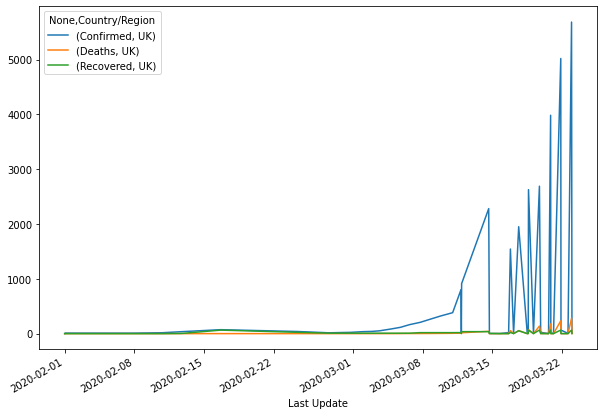

In [113]:
countries_selected = ["United Kingdom", "UK"]
grouped_data = combined_data[combined_data["Country/Region"].isin(countries_selected)].groupby(by=["Last Update", "Country/Region"]).sum()
fig, ax = plt.subplots(figsize=(10,7))
clean_data = grouped_data.unstack()
print(clean_data)
clean_data.plot(kind="line", ax=ax)